# The Rd-C Diagram for Blast Furnace
By Kejiang Li of USTB

Contact: likejiang@ustb.edu.cn

Updated on March 9, 2024

4.444444444444444
b_v*b_c*b_t: 7977.777777777776
Excess CO ratio is 1.88 and GUR(CO) is 53.09% at temperature 800.00 K
Excess CO ratio is 2.15 and GUR(CO) is 46.52% at temperature 873.00 K
Excess CO ratio is 2.53 and GUR(CO) is 39.51% at temperature 973.00 K
A, B: 0.16472714311620262 0.38203090314471705
A, B: 0.277284125088326 0.38203090314471705
A, B: 0.38984110706044944 0.38203090314471705
A, B: 0.5023980890325729 0.38203090314471705


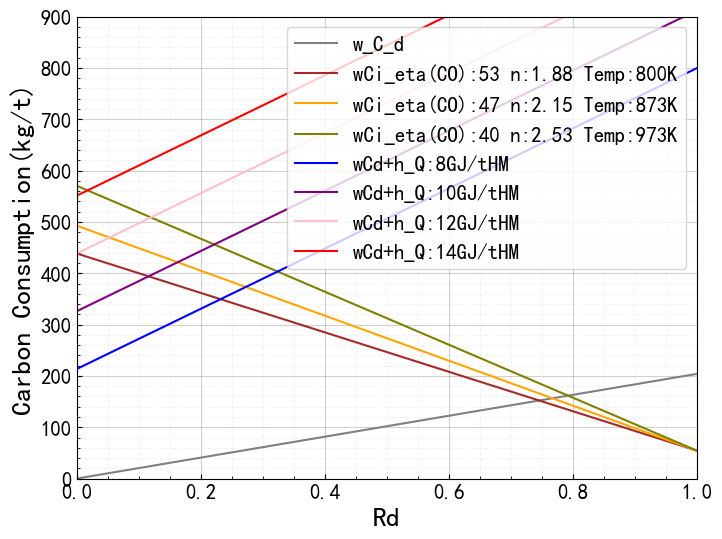

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import ThermodynamicsData

Data=ThermodynamicsData.ThermodynamicsData()
colorSel=["grey", "brown", "orange", "olive", "green", "cyan", "blue", "purple", "pink", "red", "darkgreen", "lime", "royalblue", "navy", "darkmagenta", "crimson", "tomato", "olivedrab"]

R=8.314

w_Fe_C=48.7 # carbon in iron
w_Fe=1000-w_Fe_C # 1ton iron
w_Fe_Cother=5.87 # Other_reduction
w_Fe_C_base=w_Fe_C+w_Fe_Cother

b_c=1.436 # kJ/(m3*C)
b_t=1250 #Centigrade

b_v=1*1000/12/2*22.4/1000/0.21 # the air volumn required to combust 1kg C
print(b_v)
print("b_v*b_c*b_t:", b_v*b_c*b_t)

rd=np.arange(0,1.1,0.1)

fig, ax = plt.subplots(1, figsize=(8, 6))
plt.rcParams['font.sans-serif']=['SimHei']  #显示中文字体

#FeO(s)+C-->Fe(s)+CO
w_C_d=list(map(lambda rd: 12/56*w_Fe*rd, rd))

ax.plot(rd,w_C_d,color=colorSel[0],label='w_C_d')

i=1
for temp in [800, 873, 973]: #1073, 1173, 1273, 1373, 1473]:
    #FeO(s)+CO-->Fe(s)+CO2
    Gibbs=Data.Fegibbs(temp)+Data.CO2gibbs(temp)-Data.FeOgibbs(temp)-Data.COgibbs(temp)
    K=math.exp(-Gibbs/(R*temp))
    n=1+1/K #excess CO ratio
    GUR_CO=1/n*100
    print(f"Excess CO ratio is {n:.2f} and GUR(CO) is {GUR_CO:.2f}% at temperature {temp:.2f} K")
    #FeO(s)+CO-->Fe(s)+CO2
    w_C_i=list(map(lambda rd:12/56*w_Fe*n*(1-rd)+w_Fe_C_base, rd))
    ax.plot(rd, w_C_i, color=colorSel[i], label=f'wCi_eta(CO):{GUR_CO:.0f} n:{n:.2f} Temp:{temp:.0f}K')
    i+=1

for Q in [8, 10, 12, 14]: # heat in GJ/t
    #Thermal requirement from carbon
    w_C_heat=list(map(lambda rd: ((Q*1000-5073)/(9791+b_v*b_c*b_t)+(5073+0.215*b_v*b_c*b_t)/(9791+b_v*b_c*b_t)*rd)*1000, rd))
    print("A, B:",(Q*1000-5073)/(9791+b_v*b_c*b_t), (5073+0.215*b_v*b_c*b_t)/(9791+b_v*b_c*b_t))
    w_C_d_heat = [x + y for x, y in zip(w_C_d, w_C_heat)]
    w_C_d_heat_CDissolution = [x + w_Fe_C for x in w_C_d_heat]
    
    #ax.plot(rd,w_C_heat,color=colorSel[i],label='w_C_heat')
    #ax.plot(rd,w_C_d_heat,color=colorSel[i+1],label='w_C_d+w_C_heat')
    ax.plot(rd,w_C_d_heat_CDissolution,color=colorSel[i+2],label=f'wCd+h_Q:{Q:.0f}GJ/tHM')
    i+=1

plt.xlim(0.0,1.0)
plt.ylim(0,900)

plt.xlabel("Rd", fontsize=20)
plt.ylabel("Carbon Consumption(kg/t)", fontsize=20)

# Show the major grid lines with dark grey lines
plt.grid(visible=True, which='major', color='#666666', linestyle='-', alpha=0.3)
# Position the major ticks inside
plt.tick_params(which='major', direction='in')

# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='--', alpha=0.1)
# Position the minor ticks inside
plt.tick_params(which='minor', direction='in')

# Increase the tick label font size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Show legend outside of the plot on the right
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.legend(fontsize=15)

plt.show()
plt.close()